In [359]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

pd.set_option('mode.chained_assignment', None)

In [360]:
# Loading the .csv files using Pandas
df_game = pd.read_csv('../input/nfl-big-data-bowl-2023/games.csv')
df_scout = pd.read_csv('../input/nfl-big-data-bowl-2023/pffScoutingData.csv')
df_player = pd.read_csv('../input/nfl-big-data-bowl-2023/players.csv')
df_play = pd.read_csv('../input/nfl-big-data-bowl-2023/plays.csv')
df_week1 = pd.read_csv('../input/nfl-big-data-bowl-2023/week1.csv')
df_week2 = pd.read_csv('../input/nfl-big-data-bowl-2023/week2.csv')

# **week1 merge df_player**

In [361]:
# Merge df_week1 and df_player
df_week_1_player = pd.merge(df_week1, df_player, on=['nflId'])
df_week_1_player

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,...,0.03,165.16,84.99,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,...,0.02,164.33,92.87,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,...,0.01,160.24,68.55,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,...,0.06,152.13,296.85,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,...,0.04,148.33,287.55,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069503,2021091300,4094,48220.0,46,2021-09-14T03:24:20.000,65.0,BAL,left,43.49,39.86,...,0.59,318.58,342.01,None,6-4,308,1997-08-13,California,G,Patrick Mekari
1069504,2021091300,4094,48220.0,47,2021-09-14T03:24:20.100,65.0,BAL,left,43.31,40.43,...,0.60,315.03,341.46,None,6-4,308,1997-08-13,California,G,Patrick Mekari
1069505,2021091300,4094,48220.0,48,2021-09-14T03:24:20.200,65.0,BAL,left,43.09,41.00,...,0.61,318.59,339.48,None,6-4,308,1997-08-13,California,G,Patrick Mekari
1069506,2021091300,4094,48220.0,49,2021-09-14T03:24:20.300,65.0,BAL,left,42.87,41.57,...,0.61,316.08,338.39,None,6-4,308,1997-08-13,California,G,Patrick Mekari


# **取OLB位置的球員**

In [362]:
officialPositionFilter = df_week_1_player['officialPosition'] == 'OLB'
df_week_1_player = df_week_1_player.loc[officialPositionFilter]

df_week_1_player

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName
28537,2021090900,97,53441.0,1,2021-09-10T00:26:31.100,11.0,DAL,right,43.71,21.88,...,0.01,276.51,290.12,None,6-3,245,NaN,NaN,OLB,Micah Parsons
28538,2021090900,97,53441.0,2,2021-09-10T00:26:31.200,11.0,DAL,right,43.71,21.88,...,0.00,276.51,289.82,None,6-3,245,NaN,NaN,OLB,Micah Parsons
28539,2021090900,97,53441.0,3,2021-09-10T00:26:31.300,11.0,DAL,right,43.71,21.89,...,0.01,277.16,296.04,None,6-3,245,NaN,NaN,OLB,Micah Parsons
28540,2021090900,97,53441.0,4,2021-09-10T00:26:31.400,11.0,DAL,right,43.70,21.91,...,0.02,277.16,308.81,None,6-3,245,NaN,NaN,OLB,Micah Parsons
28541,2021090900,97,53441.0,5,2021-09-10T00:26:31.500,11.0,DAL,right,43.69,21.92,...,0.01,277.16,325.47,None,6-3,245,NaN,NaN,OLB,Micah Parsons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068504,2021091300,4586,47868.0,30,2021-09-14T03:45:34.700,45.0,BAL,left,20.25,27.81,...,0.30,64.35,83.24,pass_forward,6-5,275,1995-12-14,Louisiana Tech,OLB,Jaylon Ferguson
1068505,2021091300,4586,47868.0,31,2021-09-14T03:45:34.800,45.0,BAL,left,20.60,27.86,...,0.35,59.22,84.81,None,6-5,275,1995-12-14,Louisiana Tech,OLB,Jaylon Ferguson
1068506,2021091300,4586,47868.0,32,2021-09-14T03:45:34.900,45.0,BAL,left,20.97,27.88,...,0.37,62.57,86.37,None,6-5,275,1995-12-14,Louisiana Tech,OLB,Jaylon Ferguson
1068507,2021091300,4586,47868.0,33,2021-09-14T03:45:35.000,45.0,BAL,left,21.35,27.90,...,0.39,65.94,88.01,None,6-5,275,1995-12-14,Louisiana Tech,OLB,Jaylon Ferguson


# **看S資料分佈**

In [363]:
df_week_1_player['s'].describe()

count    75326.000000
mean         2.544848
std          1.867308
min          0.000000
25%          0.830000
50%          2.480000
75%          3.960000
max          9.460000
Name: s, dtype: float64

# **計算年齡Function**

In [364]:
def get_age(date_val):
    today = 2023 + (1/12)
    try:
        date_val = date_val.split('-')
        bd = int(date_val[0]) + (int(date_val[1]) / 12)
    except:
        try:
            date_val = date_val.split('/')
            bd = int(date_val[0]) + (int(date_val[1]) / 12)
        except:
            return 28
    return today - bd

print(get_age('1992-04-10'))

30.75


# **計算身高Function**

In [365]:
def height_inches(h):
    temp = list(map(int, h.split('-')))
    return temp[0] * 12 * 2.54 + temp[1] * 2.54

print(height_inches('6-4'))

193.04


# **計算體重Function**

In [366]:
def weight_kg(w):
    return float (w) * 0.45

print(weight_kg('44'))

19.8


# **計算Metric BMI Function**

In [367]:
def getBMI(h, w):
    return round(float (w) / (float (h) ** 2) * 100, 4)

print(getBMI('179', '80'))

0.2497


# **設定age column**

In [368]:
df_week_1_player['age'] = df_week_1_player['birthDate'].apply(get_age)
df_week_1_player['age'].describe()

count    75326.000000
mean        28.870224
std          2.623625
min         23.500000
25%         27.000000
50%         28.333333
75%         30.416667
max         34.083333
Name: age, dtype: float64

# **設定height column**

In [369]:
df_week_1_player['height_new'] = df_week_1_player['height'].apply(height_inches)
df_week_1_player['height_new'].describe()

count    75326.000000
mean       190.153492
std          3.874787
min        182.880000
25%        187.960000
50%        190.500000
75%        193.040000
max        200.660000
Name: height_new, dtype: float64

# **設定weight column**

In [370]:
df_week_1_player['weight_new'] = df_week_1_player['weight'].apply(weight_kg)
df_week_1_player['weight_new'].describe()

count    75326.000000
mean       112.337662
std          6.624964
min         93.600000
25%        108.000000
50%        112.500000
75%        117.450000
max        129.150000
Name: weight_new, dtype: float64

# **設定BMI column**

In [371]:
df_week_1_player['BMI'] = df_week_1_player.apply(lambda r:getBMI(r['height_new'], r['weight_new']), axis = 1)
df_week_1_player['BMI'].describe()

count    75326.000000
mean         0.310597
std          0.014339
min          0.279000
25%          0.299300
50%          0.310000
75%          0.320700
max          0.363000
Name: BMI, dtype: float64

# **設定Feature and Target**

In [372]:
# Create X and y
X, y = df_week_1_player[['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir']], df_week_1_player[['s']]

# **資料分割成 X_train, X_val, y_train, y_val**

In [373]:
# Split the data into data of training and data test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# **模型訓練**

In [374]:
from xgboost import XGBRegressor

# 建立 XGBRegressor 模型
xgbrModel=XGBRegressor(learning_rate = 0.1, n_estimators = 100)
#max_depth = 13, min_child_weight = 4, gamma = 3
# 使用訓練資料訓練模型
xgbrModel.fit(X_train, y_train)
# 使用訓練資料預測
y_pred = xgbrModel.predict(X_val)
print('MAE: ', mean_absolute_error(y_pred, y_val))

MAE:  0.0872738407763897


In [375]:
features = ['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir']
importances = xgbrModel.feature_importances_
print("Features:", features)
print("Importances:", importances)

Features: ['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir']
Importances: [8.4021484e-04 7.4196397e-04 6.3015282e-04 3.8426238e-04 5.7013915e-04
 9.9594790e-01 4.3108276e-04 4.5428559e-04]


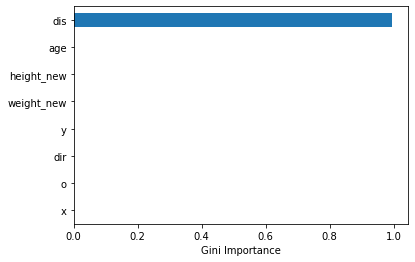

In [376]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance");

# **預測 week2**

# **week2 merge df_player**

In [377]:
# Merge df_week1 and df_player
df_week_2_player = pd.merge(df_week2, df_player, on=['nflId'])
df_week_2_player

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName
0,2021091600,65,40031.0,1,2021-09-17T00:23:09.600,23.0,NYG,right,46.32,22.36,...,0.09,271.71,79.32,None,5-11,195,1991-02-09,Rutgers,FS,Logan Ryan
1,2021091600,65,40031.0,2,2021-09-17T00:23:09.700,23.0,NYG,right,46.43,22.39,...,0.11,275.92,72.33,None,5-11,195,1991-02-09,Rutgers,FS,Logan Ryan
2,2021091600,65,40031.0,3,2021-09-17T00:23:09.800,23.0,NYG,right,46.54,22.44,...,0.12,278.85,67.03,None,5-11,195,1991-02-09,Rutgers,FS,Logan Ryan
3,2021091600,65,40031.0,4,2021-09-17T00:23:09.900,23.0,NYG,right,46.65,22.49,...,0.13,282.45,62.63,None,5-11,195,1991-02-09,Rutgers,FS,Logan Ryan
4,2021091600,65,40031.0,5,2021-09-17T00:23:10.000,23.0,NYG,right,46.77,22.56,...,0.14,285.54,59.26,None,5-11,195,1991-02-09,Rutgers,FS,Logan Ryan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997431,2021092000,3759,46157.0,52,2021-09-21T03:07:54.900,42.0,GB,right,68.04,30.79,...,0.74,359.49,354.83,autoevent_passforward,6-3,233,1995-03-21,Vanderbilt,ILB,Oren Burks
997432,2021092000,3759,46157.0,53,2021-09-21T03:07:55.000,42.0,GB,right,67.96,31.53,...,0.74,359.49,353.57,None,6-3,233,1995-03-21,Vanderbilt,ILB,Oren Burks
997433,2021092000,3759,46157.0,54,2021-09-21T03:07:55.100,42.0,GB,right,67.84,32.26,...,0.74,359.49,350.54,None,6-3,233,1995-03-21,Vanderbilt,ILB,Oren Burks
997434,2021092000,3759,46157.0,55,2021-09-21T03:07:55.200,42.0,GB,right,67.71,32.98,...,0.74,359.49,348.69,None,6-3,233,1995-03-21,Vanderbilt,ILB,Oren Burks


# **取OLB位置的球員**

In [378]:
officialPositionFilter2 = df_week_2_player['officialPosition'] == 'OLB'
df_week_2_player = df_week_2_player.loc[officialPositionFilter2]

df_week_2_player

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName
21548,2021091600,65,46135.0,1,2021-09-17T00:23:09.600,59.0,NYG,right,33.40,35.60,...,0.05,255.20,306.27,None,6-5,250,1995-12-10,Georgia,OLB,Lorenzo Carter
21549,2021091600,65,46135.0,2,2021-09-17T00:23:09.700,59.0,NYG,right,33.40,35.63,...,0.03,256.84,325.39,None,6-5,250,1995-12-10,Georgia,OLB,Lorenzo Carter
21550,2021091600,65,46135.0,3,2021-09-17T00:23:09.800,59.0,NYG,right,33.42,35.66,...,0.04,256.84,343.87,None,6-5,250,1995-12-10,Georgia,OLB,Lorenzo Carter
21551,2021091600,65,46135.0,4,2021-09-17T00:23:09.900,59.0,NYG,right,33.42,35.65,...,0.01,259.97,32.05,None,6-5,250,1995-12-10,Georgia,OLB,Lorenzo Carter
21552,2021091600,65,46135.0,5,2021-09-17T00:23:10.000,59.0,NYG,right,33.43,35.65,...,0.00,261.60,51.09,None,6-5,250,1995-12-10,Georgia,OLB,Lorenzo Carter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997150,2021092000,2437,44937.0,64,2021-09-21T02:12:54.900,44.0,DET,right,65.27,43.51,...,0.18,223.41,162.94,None,6-0,233,1995-01-31,Tennessee,OLB,Jalen Reeves-Maybin
997151,2021092000,2437,44937.0,65,2021-09-21T02:12:55.000,44.0,DET,right,65.34,43.29,...,0.23,217.00,165.37,None,6-0,233,1995-01-31,Tennessee,OLB,Jalen Reeves-Maybin
997152,2021092000,2437,44937.0,66,2021-09-21T02:12:55.100,44.0,DET,right,65.40,43.02,...,0.28,214.56,167.25,None,6-0,233,1995-01-31,Tennessee,OLB,Jalen Reeves-Maybin
997153,2021092000,2437,44937.0,67,2021-09-21T02:12:55.200,44.0,DET,right,65.47,42.71,...,0.31,212.62,168.04,None,6-0,233,1995-01-31,Tennessee,OLB,Jalen Reeves-Maybin


# **設定age column**

In [379]:
df_week_2_player['age'] = df_week_2_player['birthDate'].apply(get_age)
df_week_2_player['age'].describe()

count    70872.000000
mean        28.719423
std          2.634902
min         23.500000
25%         26.583333
50%         28.333333
75%         30.333333
max         34.083333
Name: age, dtype: float64

# **設定height column**

In [380]:
df_week_2_player['height_new'] = df_week_2_player['height'].apply(height_inches)
df_week_2_player['height_new'].describe()

count    70872.000000
mean       190.290699
std          4.050617
min        180.340000
25%        187.960000
50%        190.500000
75%        193.040000
max        200.660000
Name: height_new, dtype: float64

# **設定weight column**

In [381]:
df_week_2_player['weight_new'] = df_week_2_player['weight'].apply(weight_kg)
df_week_2_player['weight_new'].describe()

count    70872.000000
mean       112.683963
std          6.630788
min         93.600000
25%        108.000000
50%        112.500000
75%        117.900000
max        129.150000
Name: weight_new, dtype: float64

# **設定BMI column**

In [382]:
df_week_2_player['BMI'] = df_week_2_player.apply(lambda r:getBMI(r['height_new'], r['weight_new']), axis = 1)
df_week_2_player['BMI'].describe()

count    70872.000000
mean         0.311098
std          0.013881
min          0.279000
25%          0.300000
50%          0.311800
75%          0.320700
max          0.363000
Name: BMI, dtype: float64

# **設定Feature and Target**

In [383]:
# Create X and y
X_test, y_test = df_week_2_player[['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir']], df_week_2_player[['s']]

# **預測**

In [384]:
y_pred = xgbrModel.predict(X_test)
print('MAE: ', mean_absolute_error(y_pred, y_test))

MAE:  0.0893909346437607


# **加入Metric 設定Feature and Target**

In [385]:
# Create X and y
X_metric, y_metric = df_week_1_player[['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir', 'BMI']], df_week_1_player[['s']]

# **資料分割成 X_train_metric, X_val_metric, y_train_metric, y_val_metric**

In [386]:
# Split the data into data of training and data test
X_train_metric, X_val_metric, y_train_metric, y_val_metric = train_test_split(X_metric, y_metric, test_size=0.2)

# **模型訓練**

In [387]:
# 建立 XGBRegressor 模型
xgbrModel_metric = XGBRegressor(learning_rate = 0.1, n_estimators = 100)
#max_depth = 13, min_child_weight = 4, gamma = 3
# 使用訓練資料訓練模型
xgbrModel_metric.fit(X_train_metric, y_train_metric)
# 使用訓練資料預測
y_pred_metric = xgbrModel_metric.predict(X_val_metric)
print('MAE: ', mean_absolute_error(y_pred_metric, y_val_metric))

MAE:  0.08813078287625035


In [388]:
features = ['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir', 'BMI']
importances = xgbrModel_metric.feature_importances_
print("Features:", features)
print("Importances:", importances)

Features: ['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir', 'BMI']
Importances: [8.2020712e-04 3.4846051e-04 5.7036732e-04 4.1108462e-04 5.6374224e-04
 9.9584323e-01 5.0397613e-04 4.2337598e-04 5.1548070e-04]


# **設定Feature and Target**

In [389]:
# Create X and y
X_test_metric, y_test_metric = df_week_2_player[['age', 'height_new', 'weight_new', 'x', 'y', 'dis', 'o', 'dir', 'BMI']], df_week_2_player[['s']]

# **預測**

In [390]:
y_pred_metric = xgbrModel_metric.predict(X_test_metric)
print('MAE: ', mean_absolute_error(y_pred_metric, y_test_metric))

MAE:  0.08938977682668343
